In [1]:
import csv
import sqlite3
import pandas as pd
import math
# import matplotlib
# matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen

In [2]:
#conn = sqlite3.connect(':memory:')
conn = sqlite3.connect('hw2recitation.db')

In [3]:
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE stocks (date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()

OperationalError: table stocks already exists

In [4]:
#conn = sqlite3.connect('example.db')
conn = sqlite3.connect('hw2recitation.db')
c = conn.cursor()

In [5]:
# Never do this -- insecure!
symbol = 'RHAT'
c.execute("SELECT * FROM stocks WHERE symbol = '%s'" % symbol)

# Do this instead
t = ('RHAT',)
c.execute('SELECT * FROM stocks WHERE symbol=?', t)
print(c.fetchone())

# Larger example that inserts many records at a time
purchases = [('2006-03-28', 'BUY', 'IBM', 1000, 45.00),
             ('2006-04-05', 'BUY', 'MSFT', 1000, 72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, 53.00),
            ]
c.executemany('INSERT INTO stocks VALUES (?,?,?,?,?)', purchases)

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)


In [6]:
d = c.execute('SELECT * FROM stocks')
d.fetchall()

[('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14),
 ('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0),
 ('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0),
 ('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)]

In [7]:
import pandas as pd

In [8]:
filepath = 'comptagevelo2009.csv'
broken_df = pd.read_csv(filepath)

In [9]:
#Look at the first three rows
broken_df[:3]

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN


In [10]:
fixed_df = pd.read_csv(filepath, sep=',', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,BrÃ©beuf
Date,,,,,
2009-01-01,00:00,29,20,35,NaN
2009-01-02,00:00,19,3,22,NaN
2009-01-03,00:00,24,12,22,NaN


In [11]:
#Select a column
fixed_df['Berri1'][0:10]

Date
2009-01-01     29
2009-01-02     19
2009-01-03     24
2009-01-04     24
2009-01-05    120
2009-01-06    261
2009-01-07     60
2009-01-08     24
2009-01-09     35
2009-01-10     81
Name: Berri1, dtype: int64

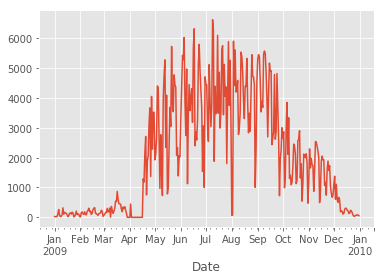

In [12]:
fixed_df['Berri1'].plot()


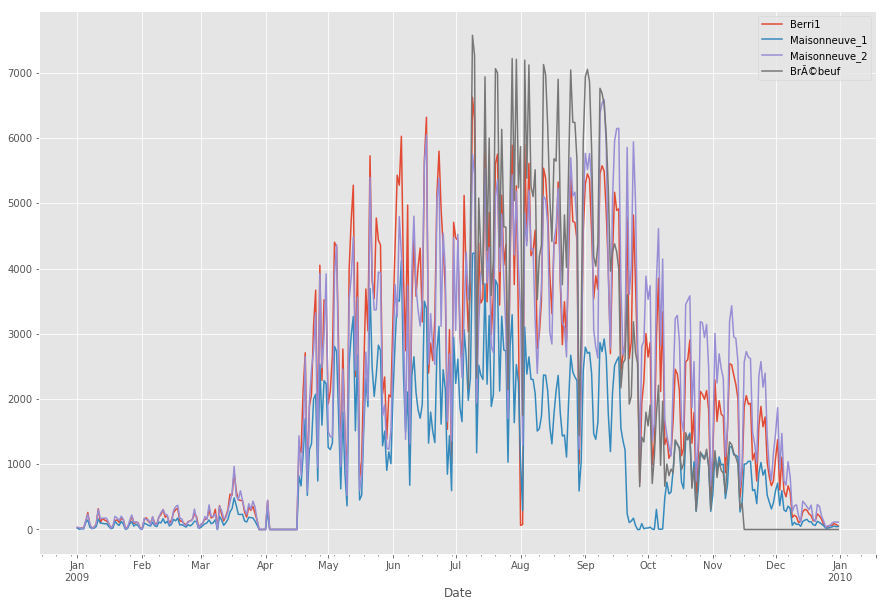

In [13]:
fixed_df.plot(figsize=(15, 10))

In [14]:
#Create new column
fixed_df['dummy'] = fixed_df['Berri1'].apply(lambda x : 'A' if x>30 else 'B')

In [15]:
#View two columns
fixed_df[['dummy','Berri1']][0:10]

,dummy,Berri1
Date,,
2009-01-01,B,29
2009-01-02,B,19
2009-01-03,B,24
2009-01-04,B,24
2009-01-05,A,120
2009-01-06,A,261
2009-01-07,A,60
2009-01-08,B,24
2009-01-09,A,35


In [16]:
fixed_df['dummy'].value_counts()

A    337
B     28
Name: dummy, dtype: int64

In [17]:
#counts = fixed_df.groupby('dummy').aggregate(sum)
counts = fixed_df.groupby('dummy').sum()
print(counts)

       Berri1  Maisonneuve_1  Maisonneuve_2  BrÃ©beuf
dummy                                                
A      741547         386906         763847  458592.0
B         206             86            160       0.0


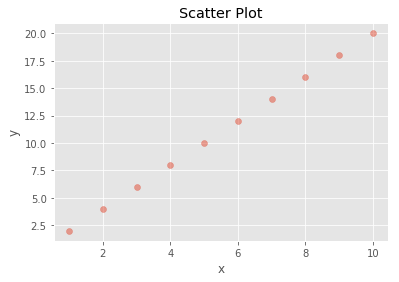

In [18]:
#Scatter Plot
x = [1,2,3,4,5,6,7,8,9,10]
y = [2*i for i in x]
plt.scatter(x, y,alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

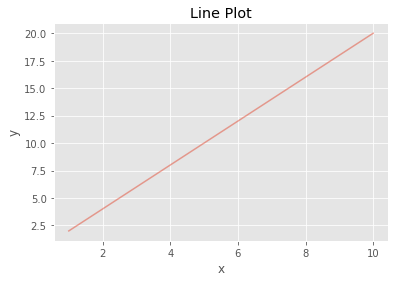

In [19]:
#Line Plot
x = [1,2,3,4,5,6,7,8,9,10]
y = [2*i for i in x]
plt.plot(x, y,alpha=0.5)
plt.title('Line Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()